# Analysis Notebook
Analysis for each of [cqt/wcqt/hcqt], and then comparison between them.

In [3]:
## General Functions & Data Loading
import claudio
import librosa
import numpy as np
import os
import pandas
import pprint
import hcnn.common.config as C
import hcnn.common.utils as utils
import hcnn.train.analyze
import hcnn.train.models

%matplotlib inline
import seaborn
import mpld3
import matplotlib.pyplot as plt

seaborn.set()
np.set_printoptions(precision=4, suppress=True)
mpld3.enable_notebook()

config = C.Config.from_yaml("./data/master_config.yaml")

# Paths
models_dir = os.path.expanduser(config["paths/model_dir"])
datasets_file = config['dataframes/datasets']
notes_file = config['dataframes/notes']
features_df_fn = config['dataframes/features']
datasets_path = os.path.join(extract_path, datasets_file)
notes_path = os.path.join(extract_path, notes_file)
features_path = os.path.join(extract_path, features_df_fn)
# Load DataFrames
datasets_df = pandas.read_json(datasets_path)
notes_df = pandas.read_pickle(notes_path)
features_df = pandas.read_pickle(features_path)

def analyze_experiment(modeldef, name):
    analysis_file = os.path.join(models_dir, modeldef[0], config['experiment/analysis_format'].format(modeldef[1]))
    analysis = wcqtlib.train.analyze.PredictionAnalyzer.load(analysis_file)

    # Overall Results
#     summary_scores = analysis.dataset_summary()
#     plt.figure()
#     summary_scores.dropna().T.plot.bar()
    
    class_scores = analysis.dataset_class_wise()
    print(class_scores)
#     plt.figure()
#     class_scores.dropna().plot.bar()

ImportError: No module named 'hcnn.train.analyze'

## First, select a model for each
Make sure you have done model selection, prediction, and analysis for each model
As follows:
```
 > python manage.py model_selection <experiment_name> 
 > python manage.py predict <experiment_name> 
 > python manage.py analyze <experiment_name> 
```

In [ ]:
available_models = wcqtlib.train.models.list_models(config)
pprint.pprint(available_models)

In [ ]:
# FILL IN YOUR SELECTED MODEL HERE
#  In the form (model_name, )
cqt_model = ("exp005", "final")
wcqt_model = ""
hcqt_model = ""

## CQT Analysis

In [ ]:
analyze_experiment(cqt_model, "CQT")

## WCQT Analysis

## HCQT Analysis

In [32]:
import pandas as pd
import os
import json
results_dir = "./results"

def load_results(model_name):
    selected_model = model_name
    model_dir = os.path.join(results_dir, selected_model)
    results_json = os.path.join(model_dir, "experiment_results.json")

    with open(results_json, 'r') as fh:
        results = json.load(fh)
    return pd.DataFrame(results)
    
MF_resutls = load_results("cqt_MF_n16")
M2_results = load_results("cqt_M2_n8")
MH_results = load_results("hcqt_MH_n8")

In [33]:
MF_resutls.T[["mean_accuracy", "mean_precision", "mean_recall", "mean_f1"]]

,mean_accuracy,mean_precision,mean_recall,mean_f1
experiment,cqt_MF_n16,cqt_MF_n16,cqt_MF_n16,cqt_MF_n16
philharmonia,0.105908,0.0788645,0.102196,0.079469
rwc,0.0722865,0.0797817,0.0799759,0.0506909
uiowa,0.0733568,0.0891573,0.0805619,0.0473988


In [34]:
M2_results.T[["mean_accuracy", "mean_precision", "mean_recall", "mean_f1"]]

,mean_accuracy,mean_precision,mean_recall,mean_f1
experiment,cqt_M2_n8,cqt_M2_n8,cqt_M2_n8,cqt_M2_n8
philharmonia,0.0637465,0.129237,0.123358,0.0650723
rwc,0.138368,0.10269,0.127216,0.0919328
uiowa,0.113556,0.129524,0.136529,0.0961249


In [35]:
MH_results.T[["mean_accuracy", "mean_precision", "mean_recall", "mean_f1"]]

,mean_accuracy,mean_precision,mean_recall,mean_f1
experiment,hcqt_MH_n8,hcqt_MH_n8,hcqt_MH_n8,hcqt_MH_n8
philharmonia,0.152739,0.119719,0.178519,0.121887
rwc,0.114055,0.0995696,0.118932,0.0783093
uiowa,0.135563,0.143195,0.137097,0.103299


In [36]:
def load_loss(model_name, hold_out):
    selected_model = model_name
    loss_dir = os.path.join(results_dir, selected_model, hold_out)
    training_loss_fp = os.path.join(loss_dir, "training_loss.pkl")
    validation_loss_fp = os.path.join(loss_dir, "validation_loss.pkl")
    training_loss = pd.read_pickle(training_loss_fp)
    validation_loss = pd.read_pickle(validation_loss_fp)
    return training_loss, validation_loss

In [45]:
%matplotlib inline
import seaborn
# import mpld3

seaborn.set()
np.set_printoptions(precision=4, suppress=True)
# mpld3.enable_notebook()
import matplotlib.pyplot as plt

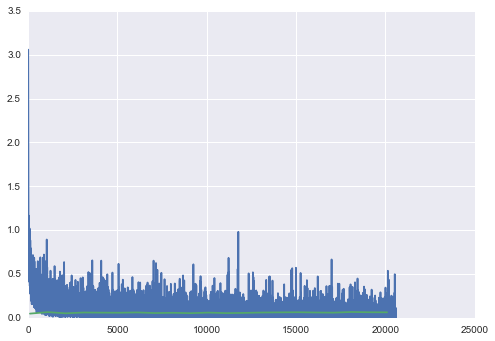

In [53]:
training_loss, validation_loss = load_loss("cqt_MF_n16", "philharmonia")
plt.plot(training_loss['iteration'], training_loss['loss'])
# plt.plot(validation_loss['model_iteration'], validation_loss['mean_loss'])
plt.plot(validation_loss['model_iteration'], validation_loss['f1_weighted'])
plt.show()